## Imports

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from numpy import ndarray
%matplotlib inline

from typing import Callable
from typing import Dict

In [ ]:
np.set_printoptions(precision=4)

# Illustration of Python lists vs. Numpy arrays

In [ ]:
print("Python list operations:")
a = [1,2,3]
b = [4,5,6]
print("a+b:", a + b)
try:
    print(a * b)
except TypeError:
    print("a*b has no meaning for Python lists")
print()
print("Numpy array operations:")
a = np.array([1,2,3])
b = np.array([4,5,6])
print("a+b:", a + b)
print("a*b:", a * b)

Python list operations:
a+b: [1, 2, 3, 4, 5, 6]
a*b has no meaning for Python lists

Numpy array operations:
a+b: [5 7 9]
a*b: [ 4 10 18]


In [ ]:
a = np.array([[1,2,3],
              [4,5,6]])
print(a)

[[1 2 3]
 [4 5 6]]


In [ ]:
b = np.array([10,20,30])
print("a + b:\n", a + b)

a + b:
 [[11 22 33]
 [14 25 36]]


In [ ]:
print('a:')
print(a)
print('a.sum(axis=0):', a.sum(axis=0))
print('a.sum(axis=1):', a.sum(axis=1))

a:
[[1 2 3]
 [4 5 6]]
a.sum(axis=0): [5 7 9]
a.sum(axis=1): [ 6 15]


# Basic functions

In [ ]:
def square(x: ndarray) -> ndarray:
    '''
    Square each element in the input ndarray.
    '''
    return np.power(x, 2)

def leaky_relu(x: ndarray) -> ndarray:
    '''
    Apply "Leaky ReLU" function to each element in ndarray
    '''
    return np.maximum(0.2 * x, x)


In [ ]:
def sigmoid(x):
    """
    Compute the sigmoid of x.

    Parameters:
    x : A scalar or numpy array.

    Returns:
    The sigmoid of x.
    """
    return 1 / (1 + np.exp(-x))


#Implement the ReLU function in the same form as square and leaky ReLU:

In [ ]:

def relu(x: ndarray) -> ndarray:
    '''
    Apply "ReLU" function to each element in ndarray
    '''
    return np.maximum(x, 0)



#Solution:

In [ ]:

def relu(x: ndarray) -> ndarray:
    '''
    Apply "ReLU" function to each element in ndarray
    '''
    return np.maximum(0, x)

#Plotting:

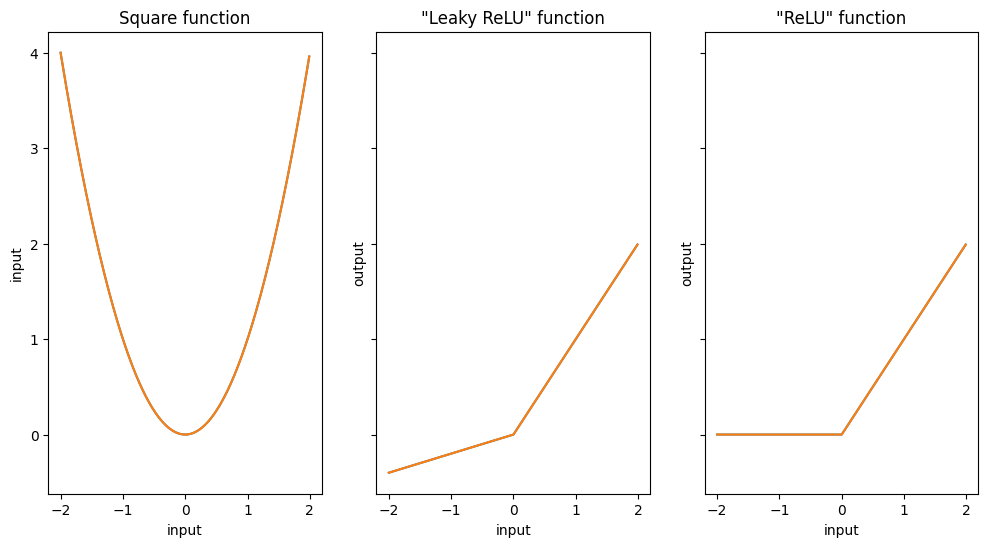

In [ ]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(12, 6))  # 2 Rows, 1 Col

input_range = np.arange(-2, 2, 0.01)
ax[0].plot(input_range, square(input_range))
ax[0].plot(input_range, square(input_range))
ax[0].set_title('Square function')
ax[0].set_xlabel('input')
ax[0].set_ylabel('input')

ax[1].plot(input_range, leaky_relu(input_range))
ax[1].plot(input_range, leaky_relu(input_range))
ax[1].set_title('"Leaky ReLU" function')
ax[1].set_xlabel('input')
ax[1].set_ylabel('output');

#Plot ReLU
ax[2].plot(input_range, relu(input_range))
ax[2].plot(input_range, relu(input_range))
ax[2].set_title('"ReLU" function')
ax[2].set_xlabel('input')
ax[2].set_ylabel('output');




Numerical Derivative (Central Difference Method):

Calculates the derivative using the central difference formula, which is a method of numerical differentiation. The central difference formula is given by, where h is some small number:

$$
f'(x) \approx \frac{f(x + h) - f(x - h)}{2h}
$$

### Implement the following derivative function based on the formula above:

In [ ]:
def deriv(func: Callable[[ndarray], ndarray],
          input_: ndarray,
          diff: float = 0.001) -> ndarray:
    '''
    Evaluates the derivative of a function "func" at every element in the "input_" array
    '''
    return (func(input_ + diff) - func(input_ - diff))/2*diff







### Solution:

In [ ]:

def deriv(func: Callable[[ndarray], ndarray],
          input_: ndarray,
          diff: float = 0.001) -> ndarray:
    '''
    Evaluates the derivative of a function "func" at every element in the "input_" array.
    '''
    return (func(input_ + diff) - func(input_ - diff)) / (2 * diff)

# `Chain`

In [ ]:
from typing import List

# A Function takes in an ndarray as an argument and produces an ndarray
Array_Function = Callable[[ndarray], ndarray]

# A Chain is a list of functions
Chain = List[Array_Function]

### Use the above types to code a function that evaluates a function of a function in a chain

In [ ]:
def chain_length_2(chain: Chain, input_array: ndarray) -> ndarray:
    '''
    Evaluates two functions in a row, in a "Chain".
    '''

    "Length of input 'chain' should be 2"

    if len(chain) != 2:
      raise ValueError("Length of input 'chain' should be 2")

    f = chain[0]
    g = chain[1]

    f_x = f(input_array)
    g_f_x = g(f_x)

    return g_f_x


### Chain_length_2 solution:

In [ ]:
def chain_length_2(chain: Chain, input_array: ndarray) -> ndarray:
    """
    Applies two functions in a row from a Chain to an input array.

    :param chain: A list of two functions, where each function takes an ndarray
                  and returns an ndarray.
    :param input_array: An ndarray to be passed through the chain of functions.
    :return: An ndarray resulting from the function chain.
    """
    # Ensure the chain length is exactly 2
    if len(chain) != 2:
        raise ValueError("Length of input 'chain' should be 2")

    # Apply the first function, then the second
    f1, f2 = chain
    f1_of_x = f1(input_array)
    final_result = f2(f1_of_x)

    return final_result

## Chain derivative



### Implement a function to take the derivative of a chain (chain rule), answer found below if needed:

In [ ]:
#Chain rule

def chain_deriv_2(chain: Chain,
                  input_range: ndarray) -> ndarray:
    '''
    Uses the chain rule to compute the derivative of two nested functions:
    (f2(f1(x))' = f2'(f1(x)) * f1'(x)
    '''

    assert len(chain) == 2, \
    "This function requires 'Chain' objects of length 2"

    assert input_range.ndim == 1, \
    "Function requires a 1 dimensional ndarray as input_range"

    f1 = chain[0]
    f2 = chain[1]

    # f1(x)
    f1_x = f1(input_range)

    # df1/du
    df1dx = deriv(f1, input_range)

    # df2/du(f1(x))
    df2du = deriv(f2, f1(input_range))

    # Multiplying these quantities together at each point
    return df1dx * df2du

### Chain_deriv_2 code solution:

In [ ]:
def chain_deriv_2(chain: Chain,
                  input_range: ndarray) -> ndarray:
    '''
    Uses the chain rule to compute the derivative of two nested functions:
    (f2(f1(x))' = f2'(f1(x)) * f1'(x)
    '''

    assert len(chain) == 2, \
    "This function requires 'Chain' objects of length 2"

    assert input_range.ndim == 1, \
    "Function requires a 1 dimensional ndarray as input_range"

    f1 = chain[0]
    f2 = chain[1]

    # f1(x)
    f1_of_x = f1(input_range)

    # df1/du
    df1dx = deriv(f1, input_range)

    # df2/du(f1(x))
    df2du = deriv(f2, f1(input_range))

    # Multiplying these quantities together at each point
    return df1dx * df2du

### Plotting Functions

In [ ]:
def plot_chain(ax,
               chain: Chain,
               input_range: ndarray) -> None:
    '''
    Plots a chain function - a function made up of
    multiple consecutive ndarray -> ndarray mappings -
    Across the input_range

    ax: matplotlib Subplot for plotting
    '''

    assert input_range.ndim == 1, \
    "Function requires a 1 dimensional ndarray as input_range"

    output_range = chain_length_2(chain, input_range)
    ax.plot(input_range, output_range)

In [ ]:
def plot_chain_deriv(ax,
                     chain: Chain,
                     input_range: ndarray) -> ndarray:
    '''
    Uses the chain rule to plot the derivative of a function consisting of two nested functions.

    ax: matplotlib Subplot for plotting
    '''
    output_range = chain_deriv_2(chain, input_range)
    ax.plot(input_range, output_range)

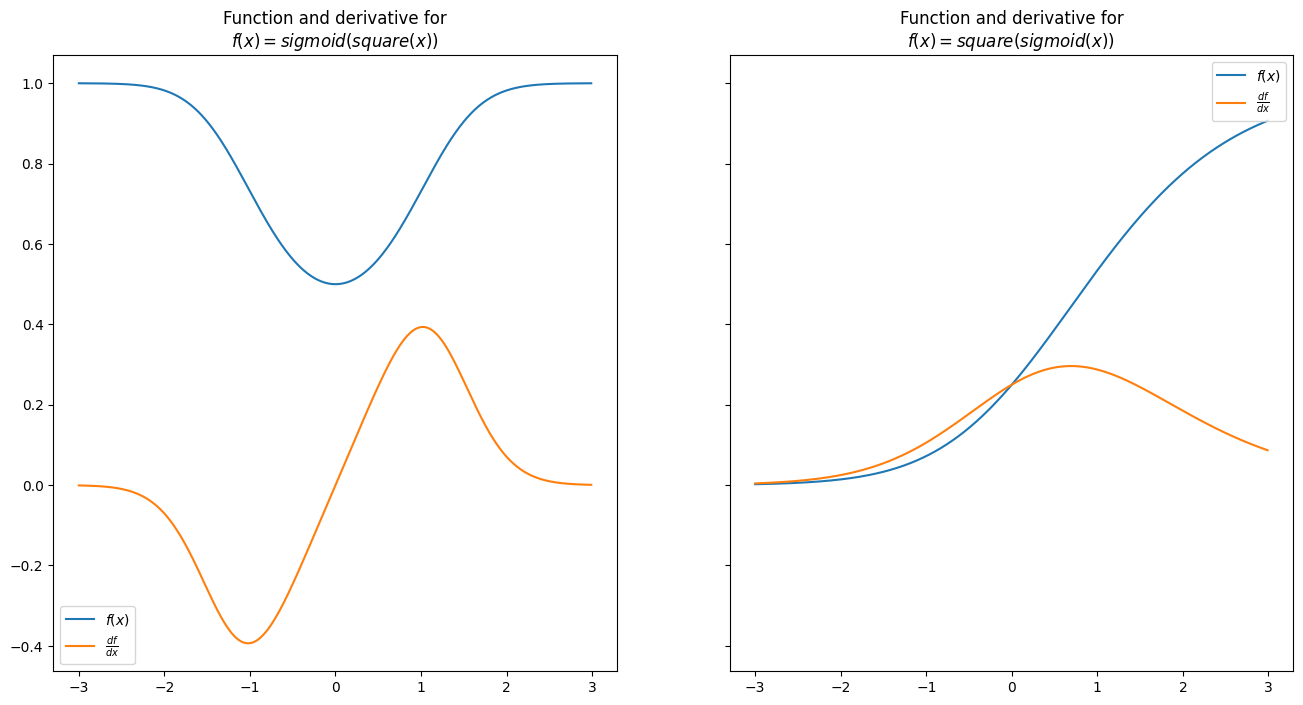

In [ ]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 8))  # 2 Rows, 1 Col

chain_1 = [square, sigmoid]
chain_2 = [sigmoid, square]

PLOT_RANGE = np.arange(-3, 3, 0.01)
plot_chain(ax[0], chain_1, PLOT_RANGE)
plot_chain_deriv(ax[0], chain_1, PLOT_RANGE)

ax[0].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[0].set_title("Function and derivative for\n$f(x) = sigmoid(square(x))$")

plot_chain(ax[1], chain_2, PLOT_RANGE)
plot_chain_deriv(ax[1], chain_2, PLOT_RANGE)
ax[1].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[1].set_title("Function and derivative for\n$f(x) = square(sigmoid(x))$");

# plt.savefig(IMG_FOLDER_PATH + "08_plot_chain_rule_1.png");
# plt.savefig(PDF_IMG_FOLDER_PATH + "08_plot_chain_rule_1.pdf");

# `Chain of length 3`

In [ ]:
def chain_length_3(chain: Chain,
                   x: ndarray) -> ndarray:
    '''
    Evaluates three functions in a row, in a "Chain".
    '''
    assert len(chain) == 3, \
    "Length of input 'chain' should be 3"

    f1 = chain[0]
    f2 = chain[1]
    f3 = chain[2]

    return f3(f2(f1(x)))

# Implement the chain derivative for a chain of 3. It is very similar to a chain of 2, just some additions to acount for the extra function!

In [ ]:
def chain_deriv_3(chain: Chain,
                  input_range: ndarray) -> ndarray:
    '''
    Uses the chain rule to compute the derivative of three nested functions:
    (f3(f2(f1)))' = f3'(f2(f1(x))) * f2'(f1(x)) * f1'(x)
    '''

    assert len(chain) == 3, \
    "This function requires 'Chain' objects to have length 3"

    f1 = chain[0]
    f2 = chain[1]
    f3 = chain[2]

    # f1(x)
    f1_x = f1(input_range)

    # f2(f1(x))
    f2_f1_x = f2(f1_x)

    # df3du
    df3du = deriv(f3, f2_f1_x)


    # df2du
    df2du = deriv(f2, f1(input_range))


    # df1dx
    df1dx = deriv(f1, input_range)

    # Multiplying these quantities together at each point
    return df1dx * df2du * df3du

# Plotting:

In [ ]:
def plot_chain(ax,
               chain: Chain,
               input_range: ndarray,
               length: int=2) -> None:
    '''
    Plots a chain function - a function made up of
    multiple consecutive ndarray -> ndarray mappings - across one range

    ax: matplotlib Subplot for plotting
    '''

    assert input_range.ndim == 1, \
    "Function requires a 1 dimensional ndarray as input_range"
    if length == 2:
        output_range = chain_length_2(chain, input_range)
    elif length == 3:
        output_range = chain_length_3(chain, input_range)
    ax.plot(input_range, output_range)

In [ ]:
def plot_chain_deriv(ax,
                     chain: Chain,
                     input_range: ndarray,
                     length: int=2) -> ndarray:
    '''
    Uses the chain rule to plot the derivative of two nested functions.

    ax: matplotlib Subplot for plotting
    '''

    if length == 2:
        output_range = chain_deriv_2(chain, input_range)
    elif length == 3:
        output_range = chain_deriv_3(chain, input_range)
    ax.plot(input_range, output_range)

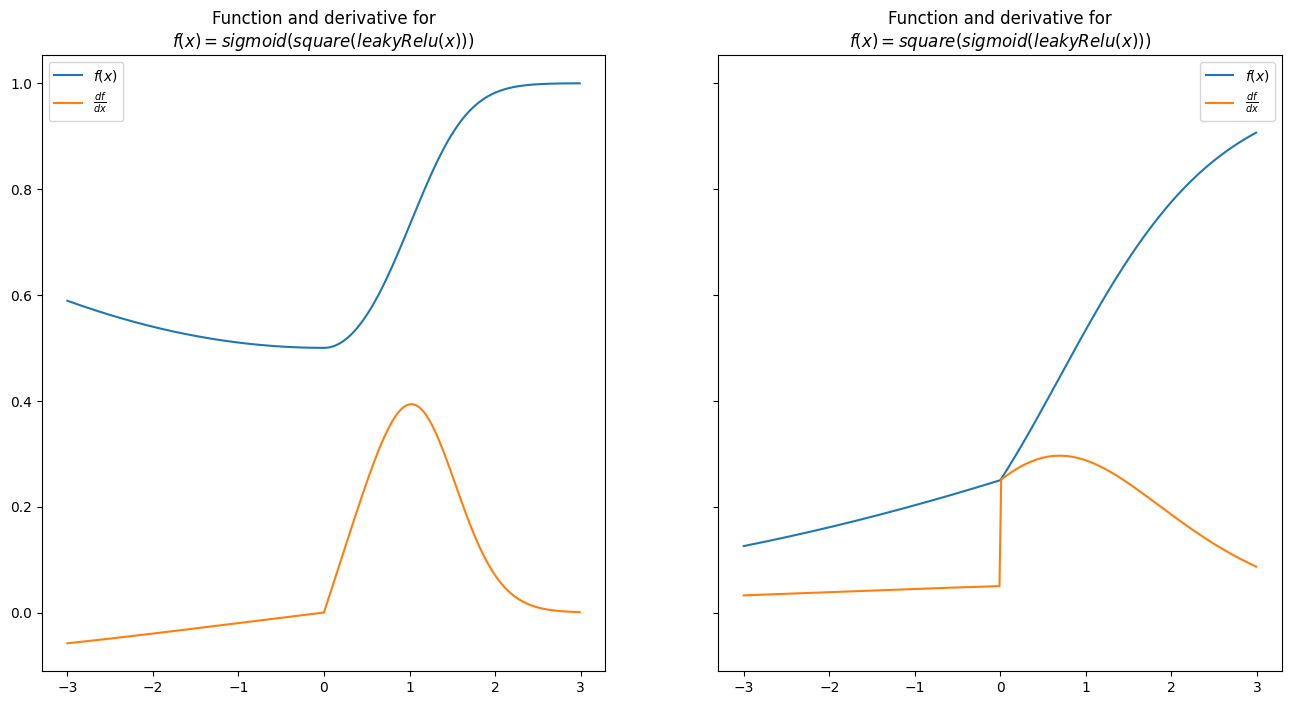

In [ ]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 8))  # 2 Rows, 1 Col

chain_1 = [leaky_relu, square, sigmoid]
chain_2 = [leaky_relu, sigmoid, square]

PLOT_RANGE = np.arange(-3, 3, 0.01)
plot_chain(ax[0], chain_1, PLOT_RANGE, length=3)
plot_chain_deriv(ax[0], chain_1, PLOT_RANGE, length=3)

ax[0].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[0].set_title("Function and derivative for\n$f(x) = sigmoid(square(leakyRelu(x)))$")

plot_chain(ax[1], chain_2, PLOT_RANGE, length=3)
plot_chain_deriv(ax[1], chain_2, PLOT_RANGE, length=3)
ax[1].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[1].set_title("Function and derivative for\n$f(x) = square(sigmoid(leakyRelu(x)))$");

# plt.savefig(IMG_FOLDER_PATH + "09_plot_chain_rule_2.png");
# plt.savefig(PDF_IMG_FOLDER_PATH + "09_plot_chain_rule_2.pdf");

### Using the above functions as building blocks, make a chain of length 3 including the ReLU function you made and plot it with its derivative:

Text(0.5, 1.0, 'Function and derivative for\n$f(x) = square(sigmoid(Relu(x)))$')

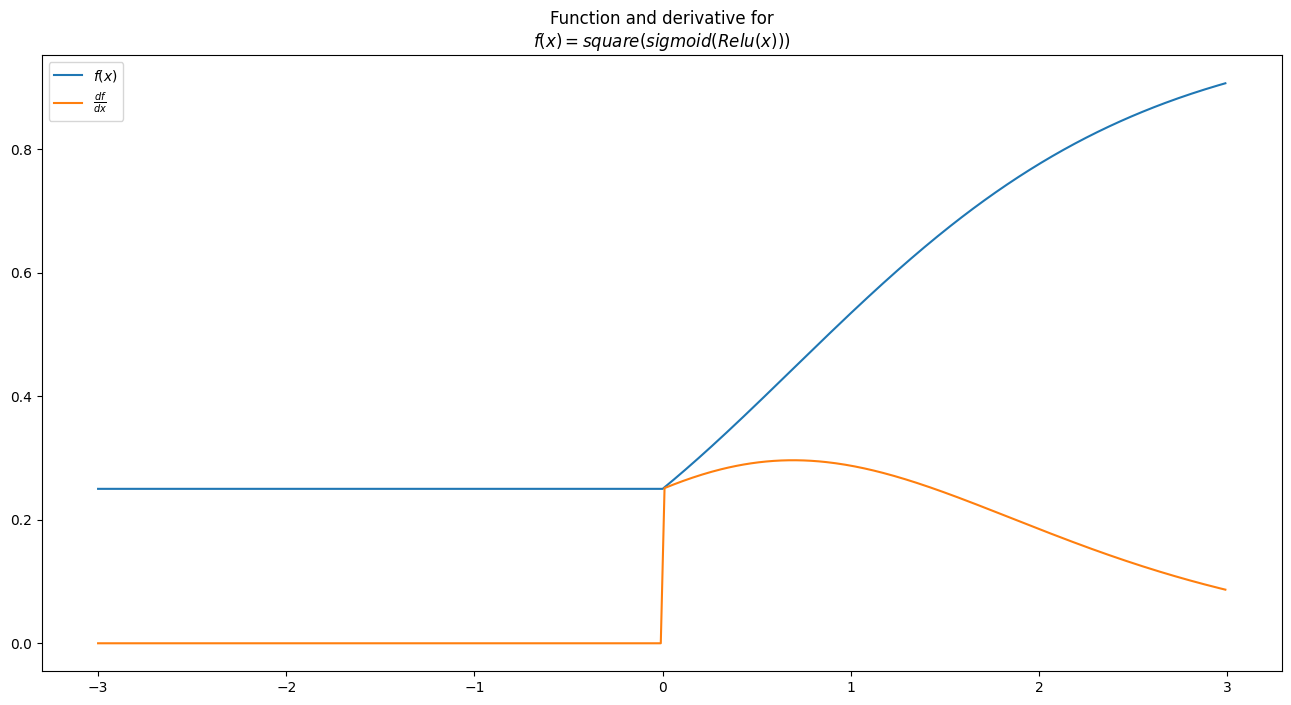

In [ ]:
### ReLU Chain:
fig, ax = plt.subplots(1, 1, sharey=True, figsize=(16, 8))

chain = [relu, sigmoid, square]

PLOT_RANGE = np.arange(-3, 3, 0.01)
plot_chain(ax, chain, PLOT_RANGE, length=3)
plot_chain_deriv(ax, chain, PLOT_RANGE, length=3)

ax.legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax.set_title("Function and derivative for\n$f(x) = square(sigmoid(Relu(x)))$")

